In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import PCA

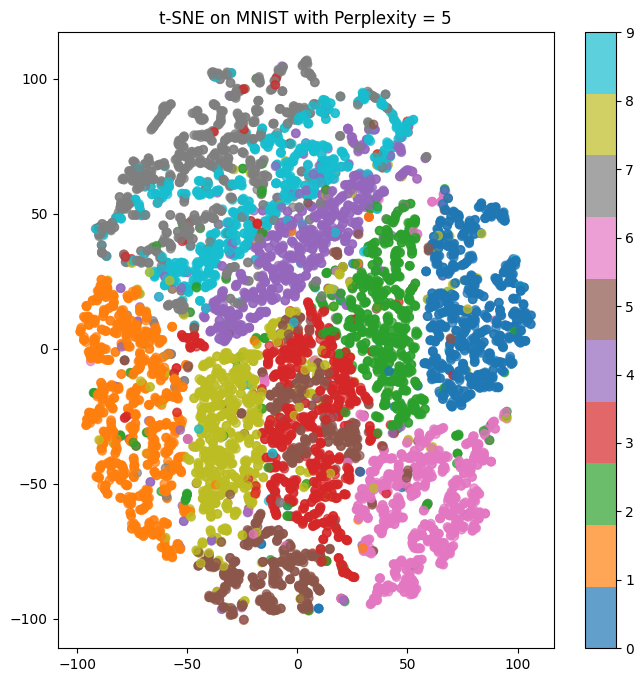

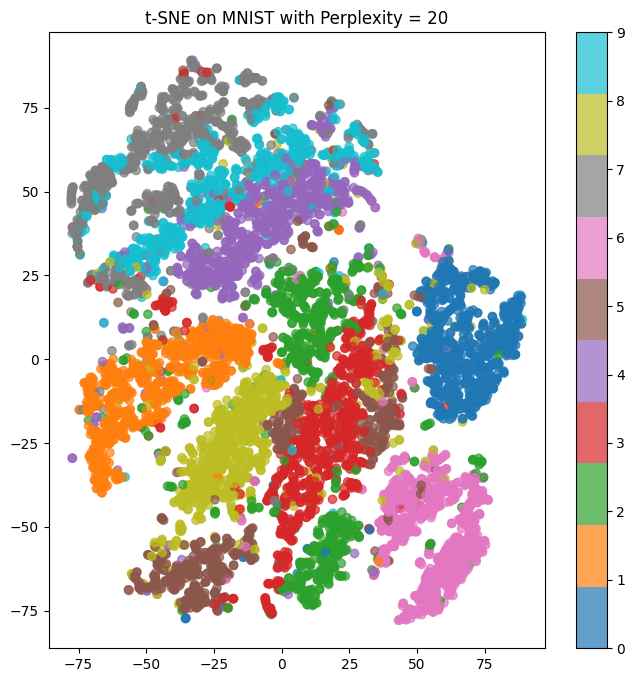

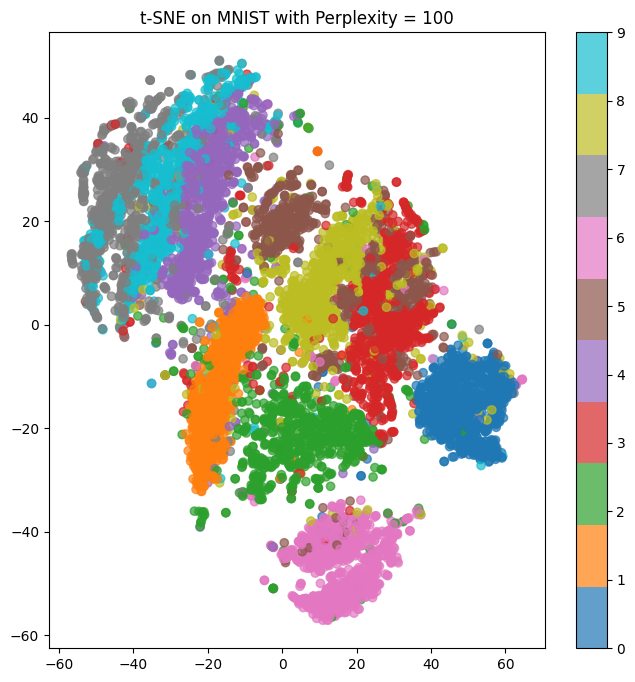

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X_mnist = mnist.data
y_mnist = mnist.target.astype(int)

X_mnist = StandardScaler().fit_transform(X_mnist)

perplexities = [5, 20, 100]

for perp in perplexities:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_embedded = tsne.fit_transform(X_mnist[:8000])

    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_mnist[:8000], cmap='tab10', alpha=0.7)
    plt.title(f"t-SNE on MNIST with Perplexity = {perp}")
    plt.colorbar(scatter)
    plt.show()


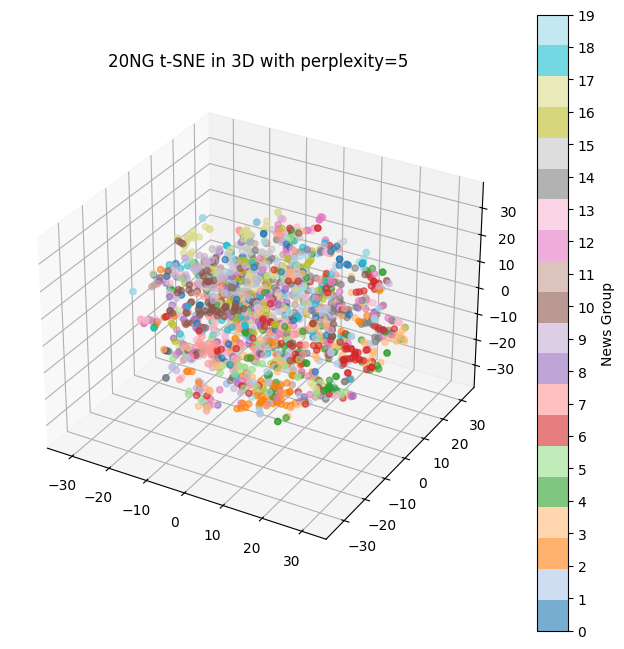

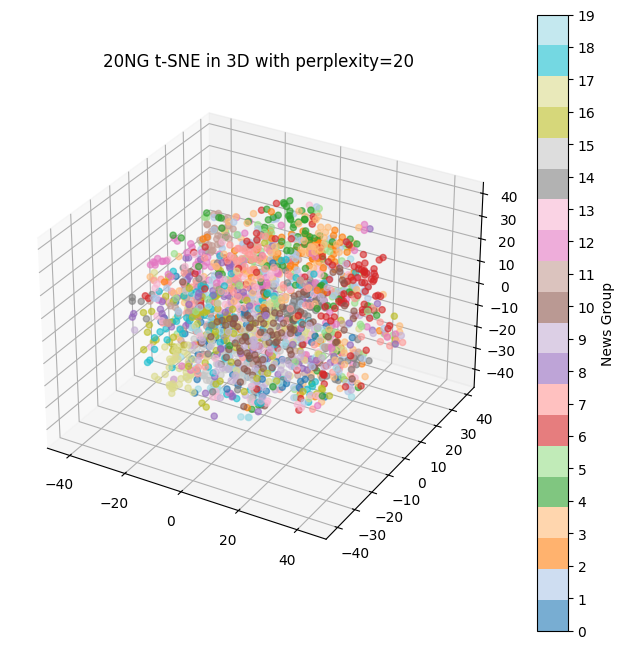

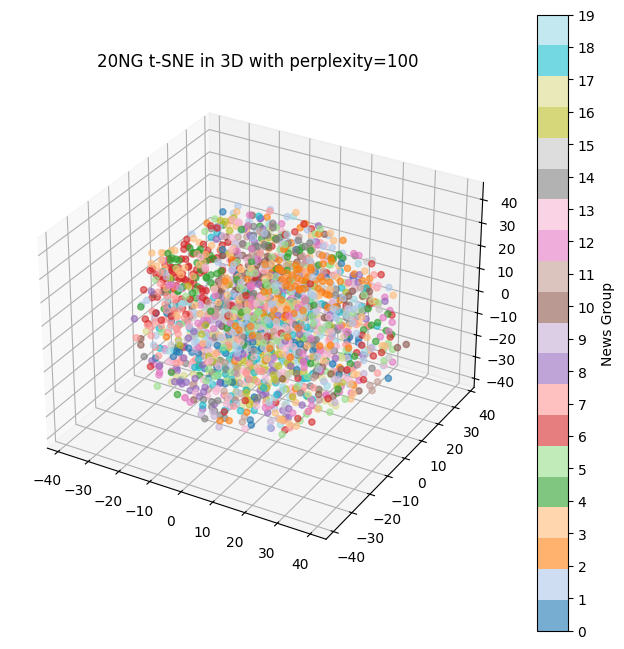

In [4]:
newsgroups = fetch_20newsgroups(subset='all')
X_text, y = newsgroups.data, newsgroups.target

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(X_text).toarray()

sample_size = 2000
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]
y_sample = np.array(y)[indices]

pca = PCA(n_components=300)
X_reduced = pca.fit_transform(X_sample)

perplexities = [5, 20, 100]
for perp in perplexities:
    tsne = TSNE(n_components=3, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X_reduced)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y_sample, cmap='tab20', alpha=0.6)
    ax.set_title(f'20NG t-SNE in 3D with perplexity={perp}')
    fig.colorbar(scatter, ticks=range(20), label='News Group')
    plt.show()



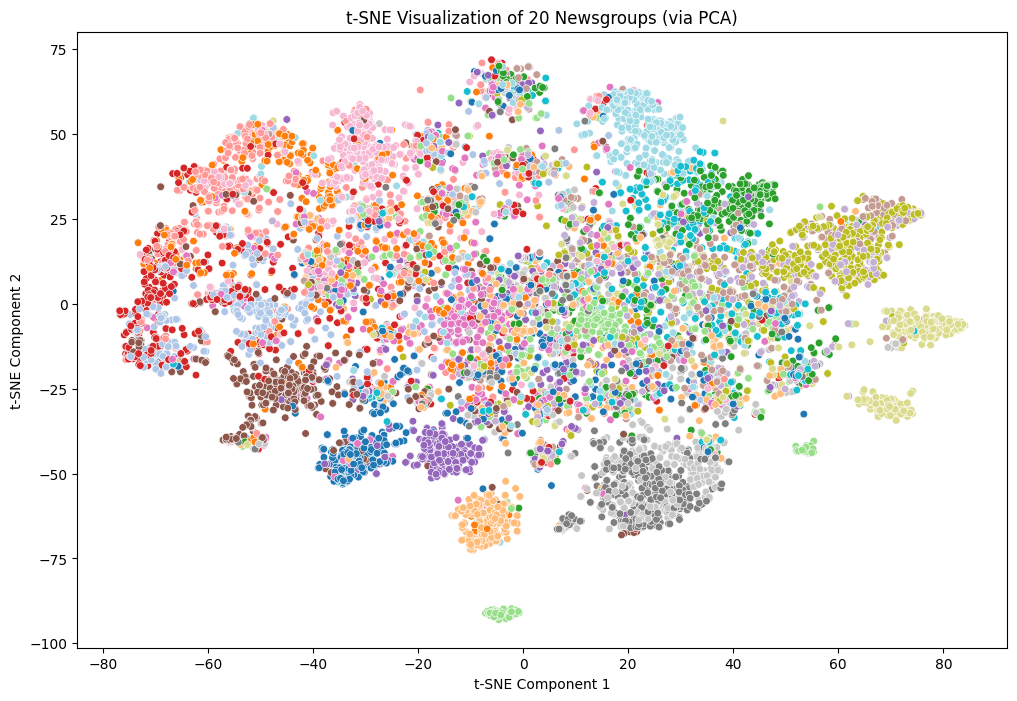

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Load 20 Newsgroups data
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

# Step 2: Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(newsgroups.data)

# Step 3: Convert to dense (required for PCA)
X_dense = X_tfidf.toarray()

# Step 4: PCA to reduce to 50 dimensions
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_dense)

# Step 5: t-SNE to reduce to 2D for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Step 6: Create DataFrame for plotting
df_tsne = pd.DataFrame({
    'x': X_tsne[:, 0],
    'y': X_tsne[:, 1],
    'label': [newsgroups.target_names[i] for i in newsgroups.target]
})

# Step 7: Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_tsne, x='x', y='y', hue='label', palette='tab20', s=30, legend=False)
plt.title("t-SNE Visualization of 20 Newsgroups (via PCA)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()
